In [1]:
#Fahad Malik, Roll# 18L-2097, MS(DS)
#Report

# The model takes about 35 seconds to run per epoch. This model achieves the respectable 
# classification Test accuracy: 0.8153 (81.53%)  at an Error rate : 18.47%
# The number of epochs are increased to 26 to increase learning capacity with the followng changes:
# Since we have seperate files of the modified dataset therefore both cats and dogs data is merged in an single array variable
# along with their labels in the preprocessing fuction since images size are already of 64x64 therefore no need to resize it.
# The data and it's corresponding on a whole are sliced to decrease noisy data and oncrease its computional speed
# The validation split is kept to 70-30% that is the general split used.
# The feature map of the convolutional layers are increased to increase the output flexibility in better data learning.
# In the architecture, relu activation function is used to linearly seperate the output within 2 classes cat or dog.
# The RMSProp optimizer is used to tackle with the noisy data and increase the accuracy.
# The changes and its details are commented with the parameters in the following cells.

from __future__ import print_function
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline

Using TensorFlow backend.


In [2]:
cats = 'C:/Users/Fahad Malik/Downloads/Compressed/CatsandDogs/cats/'
dogs = 'C:/Users/Fahad Malik/Downloads/Compressed/CatsandDogs/dogs/'


In [3]:
batch_size = 128
num_classes = 1
epochs = 26
data = []
images_dogs_cats= []
labels_dogs_cats= []
label = []
im_width = 64
im_height = 64
cats_image_files = [ f for f in os.listdir(cats) if os.path.isfile(os.path.join(cats,f)) ]
dogs_image_files = [ f for f in os.listdir(dogs) if os.path.isfile(os.path.join(dogs,f)) ]

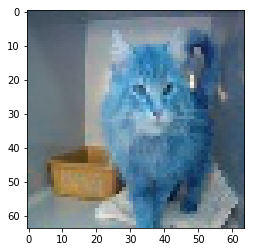

In [4]:
image_file = str(cats + cats_image_files[12])
img = cv2.imread(image_file)
plt.imshow(img)

In [5]:
print(len(cats_image_files)) 
print(len(dogs_image_files)) 

12500
12500


In [6]:
def preprocessing(ct_path,dg_path):
    progress = 0
    
    cats_image_files = [ f for f in os.listdir(ct_path) if os.path.isfile(os.path.join(ct_path,f)) ]
    dogs_image_files = [ f for f in os.listdir(dg_path) if os.path.isfile(os.path.join(dg_path,f)) ]
    
    for file in cats_image_files:
        
        image_file = str(ct_path + file)
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        #new_img = cv2.resize(img, (im_width, im_height))
        img=img.astype('float32')
        labels_dogs_cats.append(0)
        images_dogs_cats.append(img / 255)
        
        progress = progress + 1
        if progress % 1000 == 0:
            print('Progress: ' + str(progress) + ' Images Done')
        
    progress = 0
    for file in dogs_image_files:
        
        image_file = str(dg_path + file)
        img = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        #new_img = cv2.resize(img, (im_width, im_height))
        img=img.astype('float32')
        
        labels_dogs_cats.append(1)
        images_dogs_cats.append(img / 255)
        
        progress = progress + 1
        if progress % 1000 == 0:
            print('Progress: ' + str(progress) + ' Images Done')
        
    print(len(images_dogs_cats))
    print(len(labels_dogs_cats))    


In [7]:
preprocessing(cats,dogs)

Progress: 1000 Images Done
Progress: 2000 Images Done
Progress: 3000 Images Done
Progress: 4000 Images Done
Progress: 5000 Images Done
Progress: 6000 Images Done
Progress: 7000 Images Done
Progress: 8000 Images Done
Progress: 9000 Images Done
Progress: 10000 Images Done
Progress: 11000 Images Done
Progress: 12000 Images Done
Progress: 1000 Images Done
Progress: 2000 Images Done
Progress: 3000 Images Done
Progress: 4000 Images Done
Progress: 5000 Images Done
Progress: 6000 Images Done
Progress: 7000 Images Done
Progress: 8000 Images Done
Progress: 9000 Images Done
Progress: 10000 Images Done
Progress: 11000 Images Done
Progress: 12000 Images Done
25000
25000


In [8]:
# Slicing of the data and labels are done to decrease computional time and try to avoid some noisy data to increase accuracy. 
data=images_dogs_cats[0:3000] + images_dogs_cats[10500:13800]
label=labels_dogs_cats[0:3000] + labels_dogs_cats[10500:13800]

In [9]:
data = np.array(data)
print(data.shape)
# Converting it into a Tensor
data = data.reshape((data.shape)[0], (data.shape)[1], (data.shape)[2], 1)
print(data.shape)
label = np.array(label)
print(label.shape)

(6300, 64, 64)
(6300, 64, 64, 1)
(6300,)


In [10]:
# partition the data into training and testing splits using 70% of the data for training and the remaining 30% for testing
(trainX, testX, trainY, testY) = train_test_split(data,label, test_size=0.30, random_state=42)


In [11]:
# convert class vectors to binary class matrices
#trainY = keras.utils.to_categorical(trainY, num_classes)
#testY = keras.utils.to_categorical(testY, num_classes)

In [12]:
model = Sequential()

# the number of filters are increased relatively in each convolution layer to increase the output accuracy by learning the 
# input data more carefully thus avoiding noisy pixels that affect the learning of the model.
model.add(Conv2D(kernel_size=(3,3),filters=5,input_shape=(im_width, im_height, 1),activation="relu",padding="valid"))
model.add(Conv2D(kernel_size=(3,3),filters=10,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# the kernel size is changed from 5x5 to 3x3 to make the kernal size of each convolution layer same making the learning flow
# of the model smooth and steady which increases the accuracy.
model.add(Conv2D(kernel_size=(3,3),filters=15,activation="relu",padding="same"))

model.add(Conv2D(kernel_size=(3,3),filters=20,activation="relu",padding="same"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
model.add(Conv2D(kernel_size=(2,2),strides=(2,2),filters=30))
model.add(Flatten())

# Dropout rate is increased since the model has higher probability of overfitting as data is noisy therefore dropout rate is
# increased from 0.2 to 0.5
model.add(Dropout(0.5))

# Rectified Linear Units (ReLUs) activation function is used which helps the network learn non-linear decision boundaries. 
# Since we are having 2 different classes,we need a non-linear decision boundary that could separate these 2 classes 
# which are not linearly separable. and the dimensionality of the output space(unit) is increased to 128 to connect it with
# single class that is 0 or 1
model.add(Dense(128,activation="relu"))

model.add(Dense(1,activation="sigmoid"))

#Root Mean Square Propagation (RMSProp) maintains per-parameter learning rates that are adapted based on the average of 
#recent magnitudes of the gradients for the weight (e.g. how quickly it is changing).The algorithm does well on online 
#and non-stationary problems (e.g. noisy).since we have noisy data.
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

History =model.fit(trainX,trainY,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY)
                )

score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("CNN Error: %.2f%%" % (100-score[1]*100))

Train on 4410 samples, validate on 1890 samples
Epoch 1/26
 - 30s - loss: 0.5444 - acc: 0.7737 - val_loss: 0.5234 - val_acc: 0.7958
Epoch 2/26
 - 28s - loss: 0.5168 - acc: 0.7927 - val_loss: 0.5302 - val_acc: 0.7958
Epoch 3/26
 - 32s - loss: 0.5077 - acc: 0.7927 - val_loss: 0.5068 - val_acc: 0.7958
Epoch 4/26
 - 30s - loss: 0.5032 - acc: 0.7927 - val_loss: 0.5590 - val_acc: 0.7958
Epoch 5/26
 - 29s - loss: 0.4990 - acc: 0.7927 - val_loss: 0.4913 - val_acc: 0.7958
Epoch 6/26
 - 29s - loss: 0.4894 - acc: 0.7927 - val_loss: 0.4765 - val_acc: 0.7963
Epoch 7/26
 - 29s - loss: 0.4789 - acc: 0.7930 - val_loss: 0.4733 - val_acc: 0.7968
Epoch 8/26
 - 29s - loss: 0.4758 - acc: 0.7950 - val_loss: 0.4809 - val_acc: 0.7958
Epoch 9/26
 - 29s - loss: 0.4764 - acc: 0.7939 - val_loss: 0.5353 - val_acc: 0.7704
Epoch 10/26
 - 30s - loss: 0.4690 - acc: 0.7973 - val_loss: 0.4627 - val_acc: 0.7989
Epoch 11/26
 - 33s - loss: 0.4624 - acc: 0.7982 - val_loss: 0.4726 - val_acc: 0.8032
Epoch 12/26
 - 29s - loss:

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 5)         50        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 10)        460       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 15)        1365      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 20)        2720      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 20)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 30)          2430      
__________

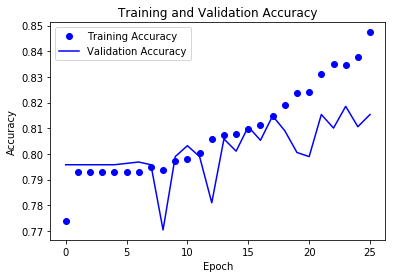

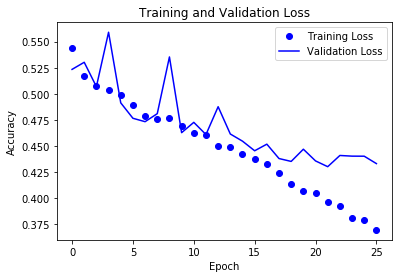

In [14]:
# Training and Validation Accuracy/loss plot below:

accuracy = History.history['acc']
val_accuracy = History.history['val_acc']
loss = History.history['loss']
val_loss = History.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()